<h1>Loading the dataset</h1>

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [130]:
df = pd.read_csv('archive.zip')


<h1>Exploratory Data Analysis and Data Cleaning</h1>

In [8]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [10]:
df.shape

(119390, 36)

In [11]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [131]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [17]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [132]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*40)

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' '

In [91]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [133]:
df.drop(['company', 'agent'],axis = 1, inplace= True ) 

In [134]:
df.dropna(inplace = True)

In [135]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [136]:
df = df[df['adr']<5000]

<h1>Data Analysis and Visualization</h1>

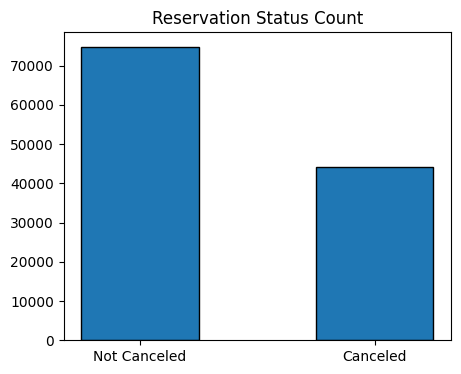

In [177]:
canceled_perc = df['is_canceled'].value_counts(normalize= True)
canceled_perc
plt.figure(figsize = (5,4))
plt.title('Reservation Status Count')
plt.bar(['Not Canceled', 'Canceled'],df['is_canceled'].value_counts(), edgecolor = 'k', width= 0.5)
plt.show()


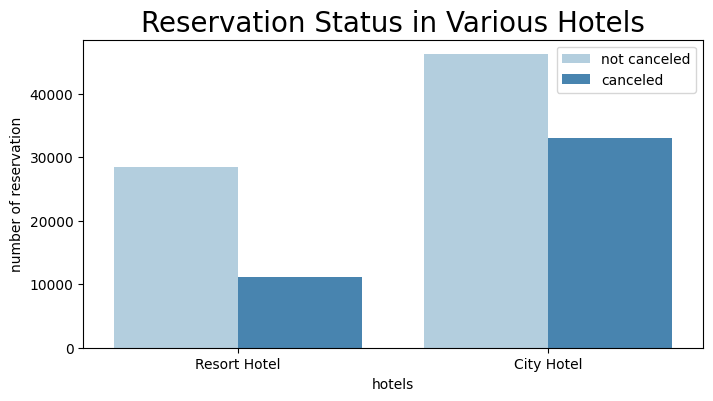

In [144]:
plt.figure(figsize = (8,4))
ax1= sns.countplot(x= 'hotel', hue = 'is_canceled', data = df, palette = 'Blues')
legend_labels,_  = ax1.get_legend_handles_labels()
# bbox_to_anchor = (1, 1)
# ax1.legend(legend_labels, ['Not Canceled', 'Canceled'], bbox_to_anchor=bbox_to_anchor)
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation Status in Various Hotels', size =20)
plt.xlabel('hotels')
plt.ylabel('number of reservation')
plt.legend(['not canceled', 'canceled'])
plt.show()

In [138]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize= True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [139]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize= True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [140]:
resort_hotel= resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel= city_hotel.groupby('reservation_status_date')[['adr']].mean()

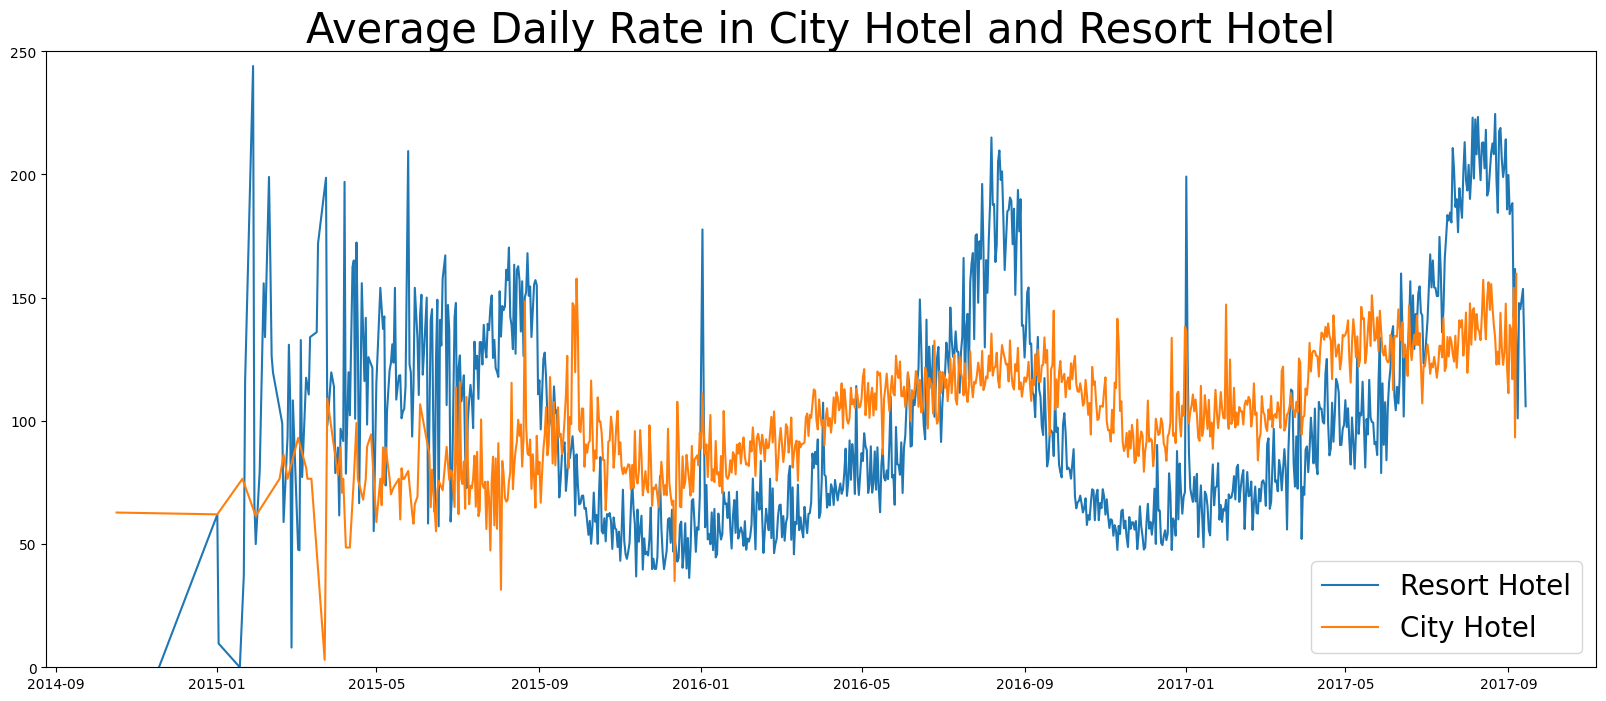

In [141]:
plt.figure(figsize = (20,8))
plt.title('Average Daily Rate in City Hotel and Resort Hotel', fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize =20)
plt.ylim(0,250)
plt.xlim()
plt.show()

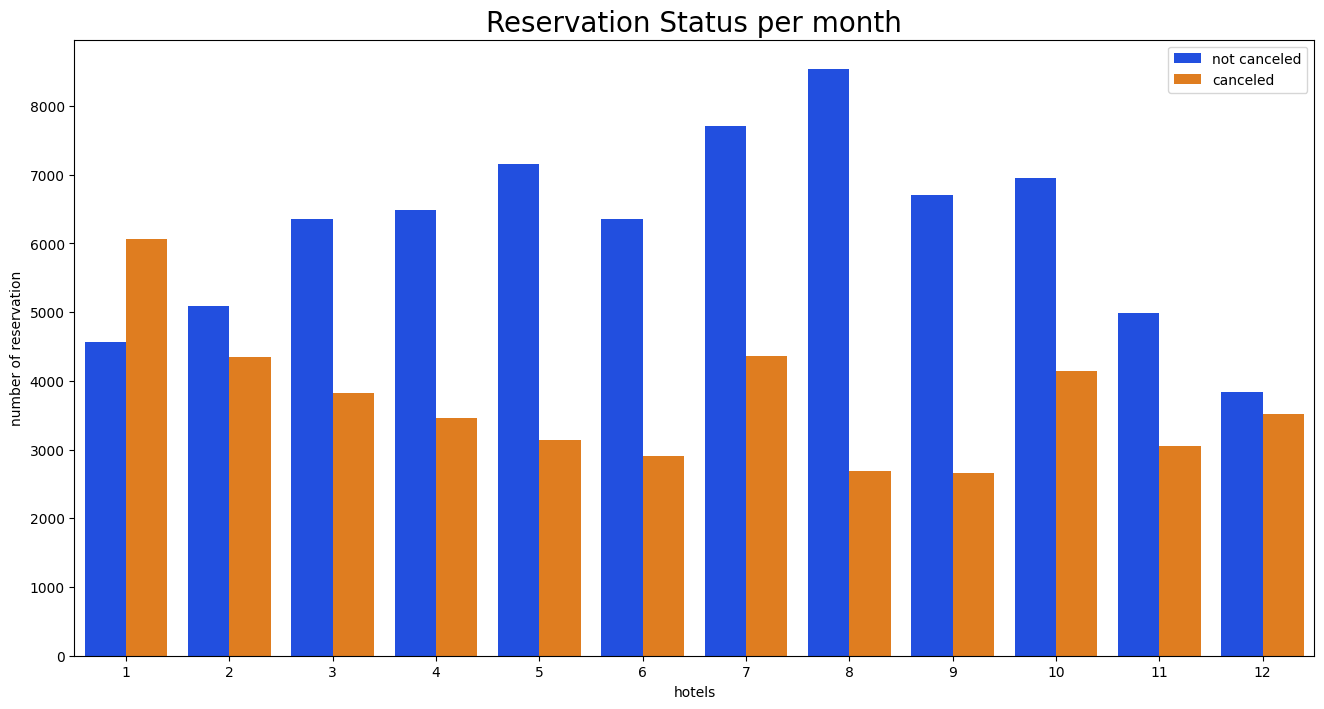

In [151]:
df['month']= df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x= 'month', hue= 'is_canceled', data = df, palette= 'bright')
legend_labels,_  = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation Status per month', size =20)
plt.xlabel('hotels')
plt.ylabel('number of reservation')
plt.legend(['not canceled', 'canceled'])
plt.show()

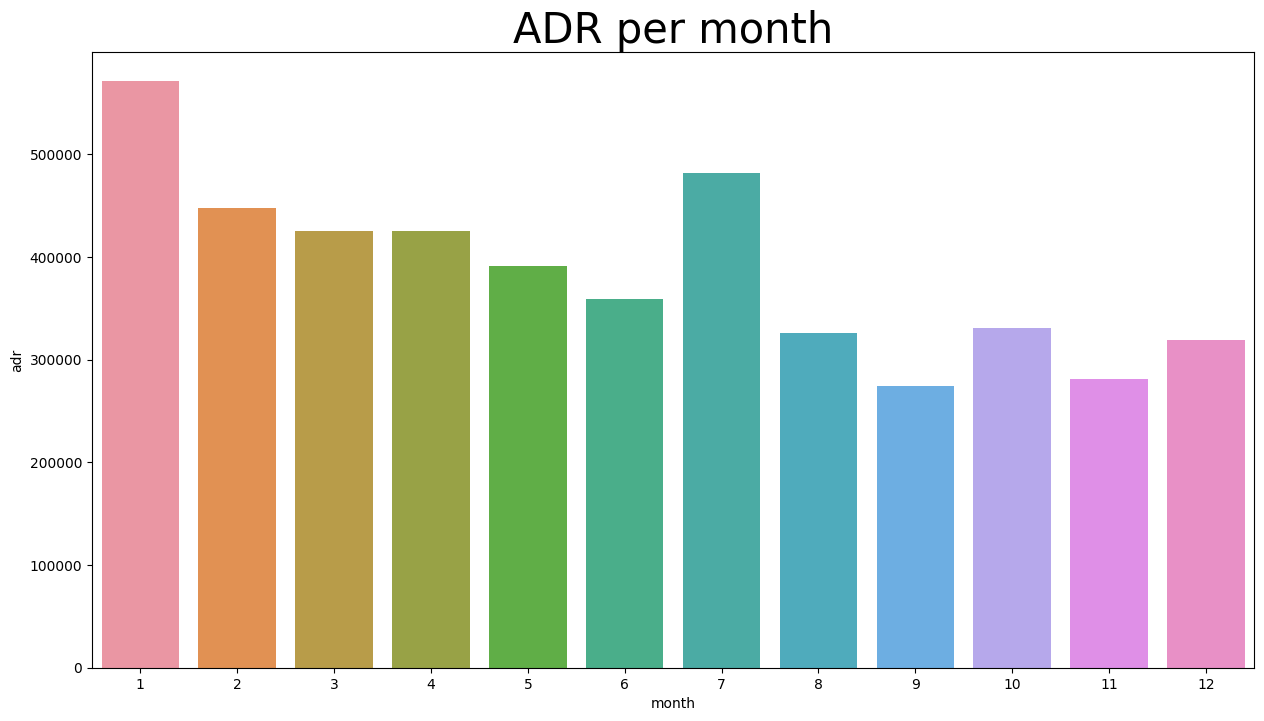

In [155]:


plt.figure(figsize=(15, 8))
plt.title('ADR per month', fontsize=30)
sum_adr_by_month = df[df['is_canceled'] == 1].groupby('month')['adr'].sum().reset_index()
sns.barplot(x='month', y='adr', data=sum_adr_by_month)
plt.show()


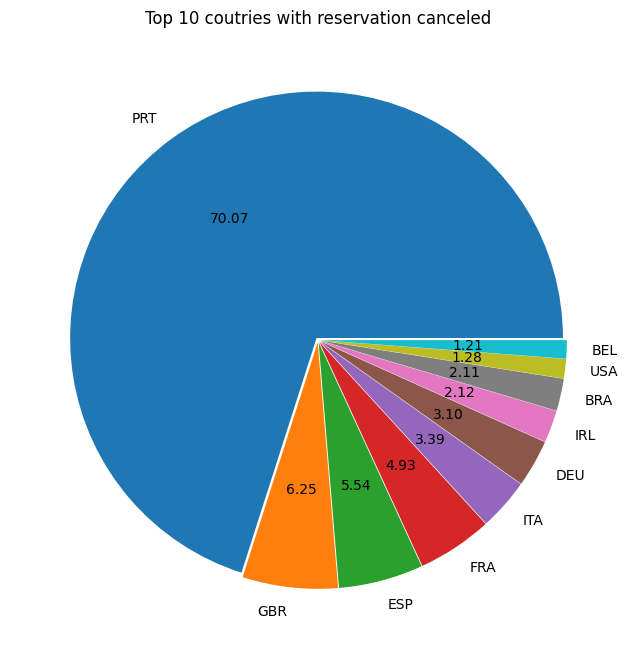

In [161]:
canceled_data = df[df['is_canceled']==1]
top_ten_country = canceled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title('Top 10 coutries with reservation canceled')
plt.pie(top_ten_country, autopct = '%.2f', explode = [0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01] , labels = top_ten_country.index)
plt.show()

In [162]:
df['market_segment'].value_counts(normalize= True)

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [164]:
 canceled_data['market_segment'].value_counts(normalize= True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

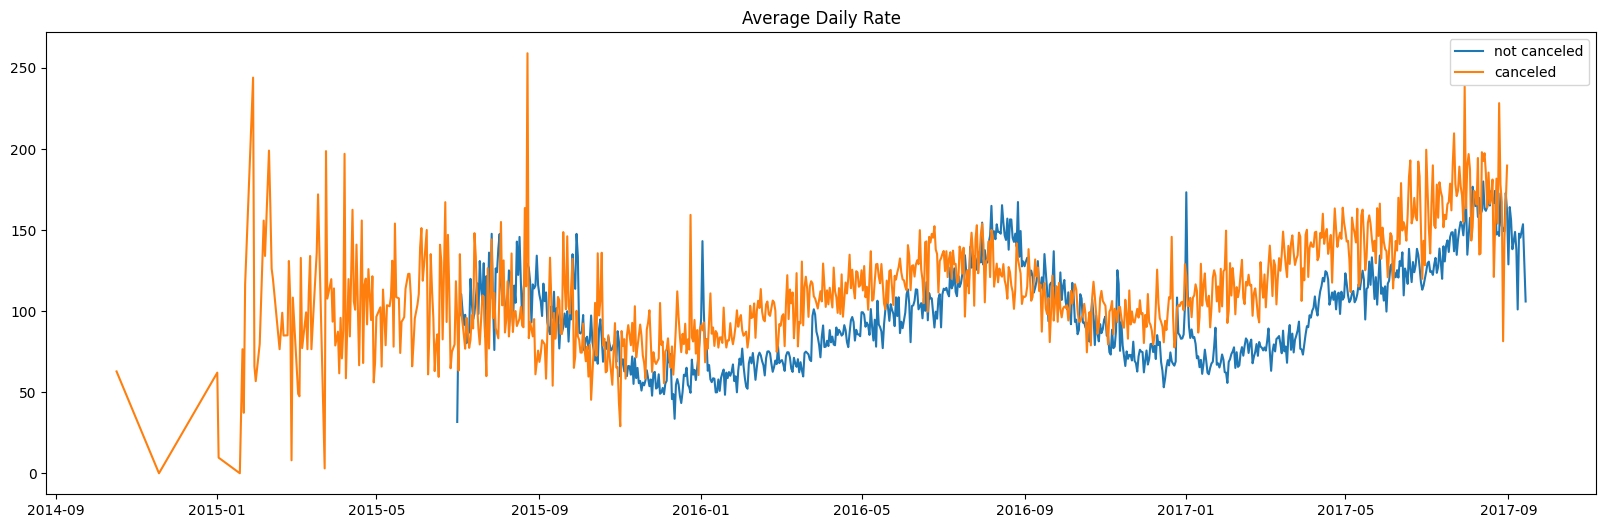

In [173]:


canceled_df_adr = canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_df_adr.reset_index(inplace=True) 
canceled_df_adr.sort_values('reservation_status_date', inplace=True)

not_canceled_data = df[df['is_canceled']==0]
not_canceled_df_adr = not_canceled_data.groupby('reservation_status_date')[['adr']].mean() 
not_canceled_df_adr.reset_index(inplace=True)
not_canceled_df_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize = (20,6))

plt.title('Average Daily Rate')

plt.plot(not_canceled_df_adr['reservation_status_date'], not_canceled_df_adr['adr'], label = 'not canceled') 
plt.plot(canceled_df_adr['reservation_status_date'], canceled_df_adr['adr'], label = 'canceled')

plt.legend()